In [ ]:
#step1 - add imports

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as mp

dataset=pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [2]:
dataset.shape

(2919, 13)

In [3]:
#step 2 - preprocess dataset
obj=(dataset.dtypes=='object')
object_cols=list(obj[obj].index)
print("categorical variables : ", len(object_cols))
int_=(dataset.dtypes=='int')
num_cols=list(int_[int_].index)
print("Integer variables : ", len(num_cols))
fl=(dataset.dtypes=='float')
float_cols=list(fl[fl].index)
print("Float variables : ",len(float_cols))

categorical variables :  4
Integer variables :  6
Float variables :  3


<Axes: >

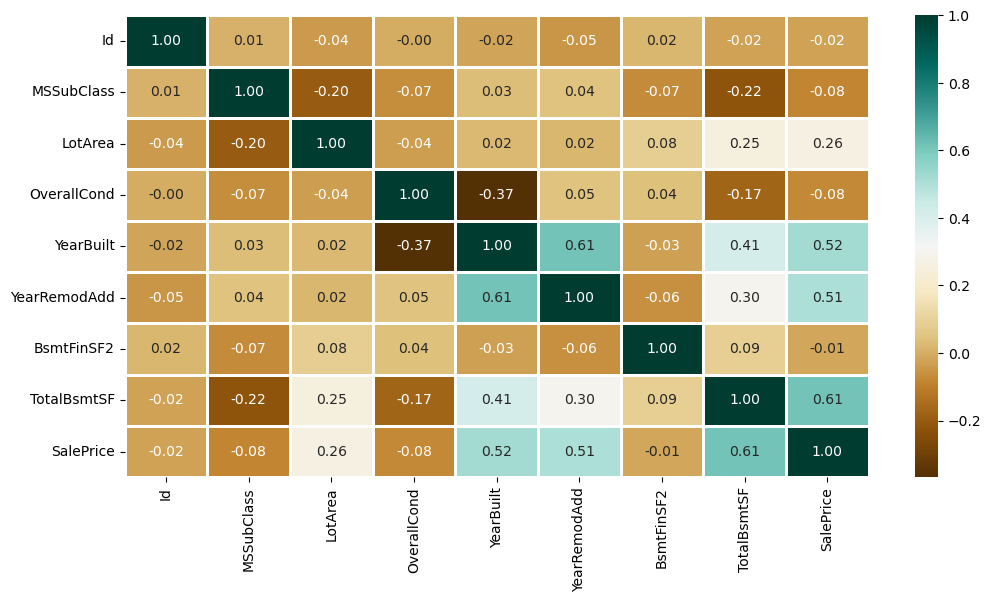

In [4]:
#step 3 - exploratory data analysis

numerical_dataset=dataset.select_dtypes(include=['number'])

mp.figure(figsize=(12,6))
#heatmap
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Axes: title={'center': 'No. unique values of categorical features'}>

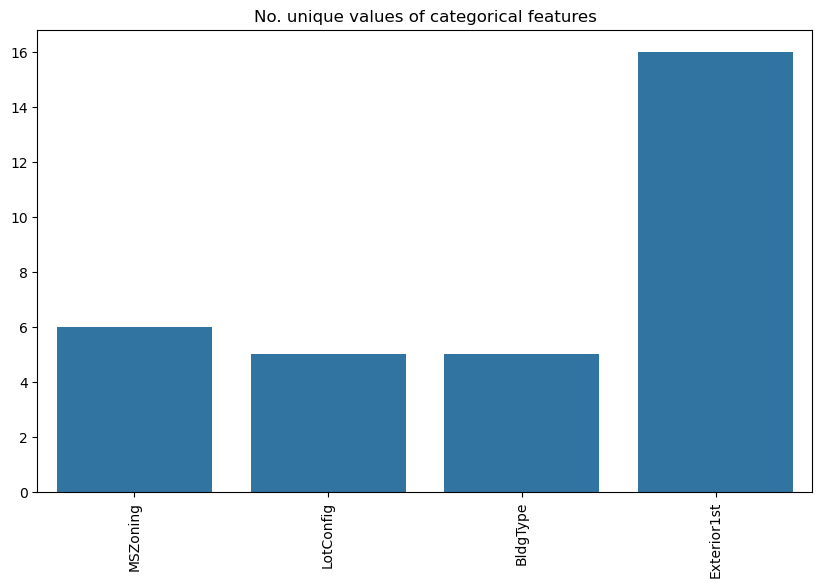

In [5]:
#bar graph

unique_values=[]
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
mp.figure(figsize=(10,6))
mp.title('No. unique values of categorical features')
mp.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

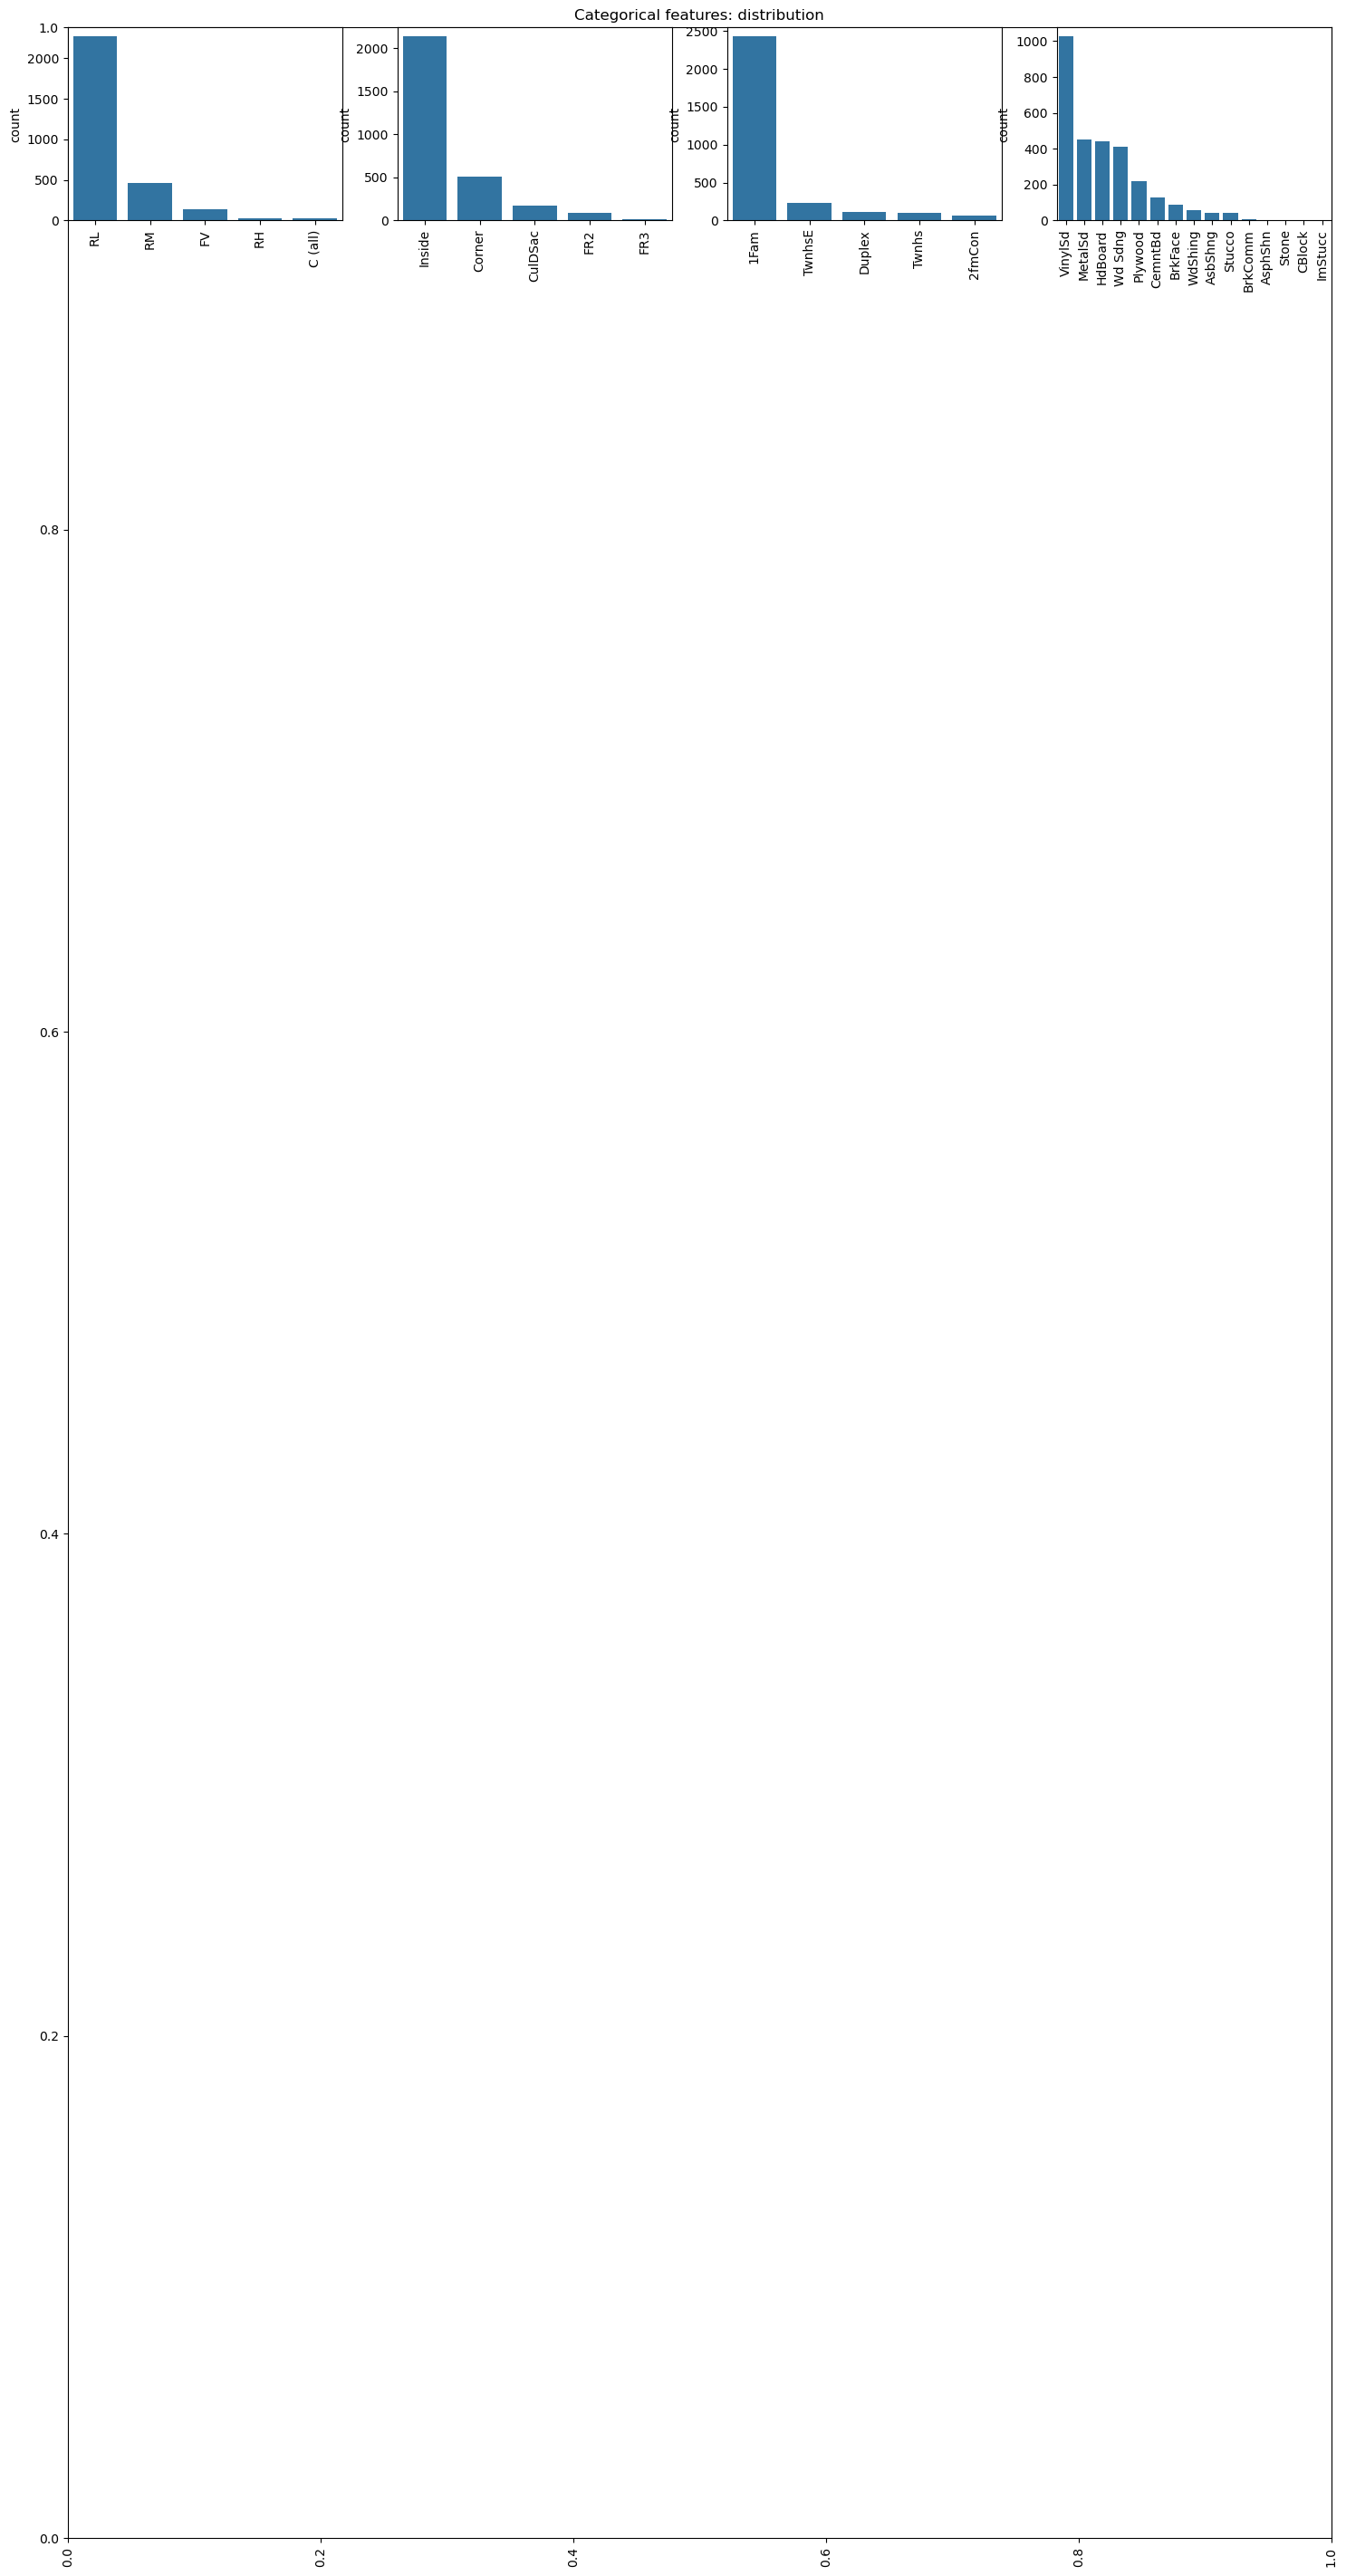

In [8]:
mp.figure(figsize=(18,36))
mp.title("Categorical features: distribution")
mp.xticks(rotation=90)
index=1

for col in object_cols:
    y=dataset[col].value_counts()
    mp.subplot(11,4,index)
    mp.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [9]:
#step 4 - data cleaning

#drop irrelevent datas
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [10]:
dataset['SalePrice']=dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean()
)

new_dataset=dataset.dropna()

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
#Step 5: OneHotEncoder - For Label categorical features
#convert the categorical features to binary vectors

from sklearn.preprocessing import OneHotEncoder

#1st collect all data with object datatype
s=(new_dataset.dtypes=='object')
object_cols=list(s[s].index)
print("categorical variables : ")
print(object_cols)
print("Number of categorical features : ", len(object_cols))

categorical variables : 
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical features :  4


In [14]:
#after collecting the objs we apply one hot encoder

OH_encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols=pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index=new_dataset.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_final=new_dataset.drop(object_cols,axis=1)
df_final=pd.concat([df_final,OH_cols],axis=1)

In [15]:
#step 6 - split dataset to training and testing

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X=df_final.drop(['SalePrice'],axis=1)
Y=df_final['SalePrice']
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,train_size=0.8,test_size=0.2, random_state=0)

In [16]:
#step 7 - model training and accuracy

#SVM - Support vector Machine

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR=svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred=model_SVR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1870512931870423


In [17]:
#Random forest regression

from sklearn.ensemble import RandomForestRegressor

model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)
Y_pred=model_RFR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.18661551880951388


In [18]:
#linear Regression

from sklearn.linear_model import LinearRegression

model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)
Y_pred=model_LR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.18741683841600082
